In [31]:
import pandas as pd
import numpy as np

In [17]:
import os
import gzip
import shutil


current_path = os.getcwd()
folder_path = current_path + '/data'  # Replace with the actual path to your folder

# Get a list of all files and folders in the directory
for filename in os.listdir(folder_path):
    file = current_path + '/data/'+ filename
    with gzip.open(file, "rb") as f_in:
        new_file = file.removesuffix('.gz')
        with open(new_file, "wb") as f_out:
            shutil.copyfileobj(f_in, f_out)

In [21]:
pd.read_csv("data/hex_OD_allactivity.csv.gz", compression="gzip")

,o_h9,d_h9,num_trips
0,89194e6e943ffff,89194e6e943ffff,3216
1,89195d3627bffff,89195d3627bffff,1829
2,89194e6520fffff,89194e65277ffff,1812
3,8919423b69bffff,8919423b69bffff,1808
4,89194e65277ffff,89194e6520fffff,1713
...,...,...,...
21769608,89194acccc7ffff,89194accd4fffff,1
21769609,89194accbdbffff,89194accb77ffff,1
21769610,891948514a7ffff,89194e26b07ffff,1
21769611,891942a826bffff,891942a8297ffff,1


In [22]:
pd.read_csv("data/msoa_OD_allactivity.csv.gz", compression="gzip")

,o_msoa,d_msoa,num_trips
0,E02007005,E02007005,28854
1,E02000524,E02000524,27280
2,E02000001,E02000001,22293
3,E02000977,E02000977,21419
4,E02007099,E02007099,21154
...,...,...,...
2502831,E02006880,E02006790,1
2502832,E02005810,E02002380,1
2502833,E02004989,E02000658,1
2502834,E02000978,E02003408,1


In [4]:
pd.read_csv("data/msoa_OD_travel2work.csv", compression="gzip")

,MSOA21CD_home,county_home,MSOA21CD_work,county_work,count
0,E02000001,GREATER_LONDON_AUTHORITY,E02000001,GREATER_LONDON_AUTHORITY,23
1,E02000001,GREATER_LONDON_AUTHORITY,E02000022,GREATER_LONDON_AUTHORITY,1
2,E02000001,GREATER_LONDON_AUTHORITY,E02000042,GREATER_LONDON_AUTHORITY,1
3,E02000001,GREATER_LONDON_AUTHORITY,E02000065,GREATER_LONDON_AUTHORITY,1
4,E02000001,GREATER_LONDON_AUTHORITY,E02000097,GREATER_LONDON_AUTHORITY,1
...,...,...,...,...,...
323609,W02000428,Abertawe,W02000369,Caerdydd,4
323610,W02000428,Abertawe,W02000384,Caerdydd,2
323611,W02000428,Abertawe,W02000398,Caerdydd,4
323612,W02000428,Abertawe,W02000417,Castell-nedd Port Talbot,2


In [25]:
traject_sample = pd.read_csv("data/trajectory_GLA_sample5000.csv.gz", compression="gzip")
traject_sample

# 1.for each user, calculate the total duration of each activity type, and get the most common activity to least common activity,
#   can be separate by weekday/weekend
# 1.1 then maybe we can do cluster based on the total activit duration
# 2. make box plot of each activity type, with y-axis as duration. also can be separate by weekday/weekend.
# 3. we can aggregate activity by day, and get the count of each activity.

,userid,start_time,end_time,duration,loc_msoa,activity
0,6B46AF01384055689E5FF203A19FFDFF,2021-11-01 10:30:00,2021-11-02 19:15:00,1963.766667,E02000275,Work
1,6B46AF01384055689E5FF203A19FFDFF,2021-11-02 21:30:00,2021-11-03 23:30:00,1567.716667,E02000770,Home
2,6B46AF01384055689E5FF203A19FFDFF,2021-11-05 10:15:00,2021-11-05 11:00:00,30.266667,E02007019,Shopping_2
3,6B46AF01384055689E5FF203A19FFDFF,2021-11-05 12:45:00,2021-11-05 15:15:00,140.216667,E02000770,Home
4,6B46AF01384055689E5FF203A19FFDFF,2021-11-05 16:30:00,2021-11-05 17:15:00,40.033333,E02000772,Shopping_2
...,...,...,...,...,...,...
575105,6B2102F15AEAC07546E3E9488423AB2C,2021-11-27 14:30:00,2021-11-27 14:45:00,2.083333,E02004979,Others
575106,6B2102F15AEAC07546E3E9488423AB2C,2021-11-27 15:45:00,2021-11-27 16:00:00,10.066667,E02000436,Others
575107,6B2102F15AEAC07546E3E9488423AB2C,2021-11-28 12:30:00,2021-11-28 12:30:00,3.100000,E02000454,Others
575108,6B2102F15AEAC07546E3E9488423AB2C,2021-11-28 14:15:00,2021-11-28 14:30:00,9.933333,E02000436,Others


## Add weekday information

In [32]:
traject_sample['start_time'] = pd.to_datetime(traject_sample['start_time'])
# Extract the full name of the day of the week.
traject_sample['day_of_week'] = traject_sample['start_time'].dt.day_name()
# Create a boolean column to identify weekends.
traject_sample['is_weekend'] = np.where(traject_sample['day_of_week'].isin(['Saturday', 'Sunday']), 'weekend', 'weekday')

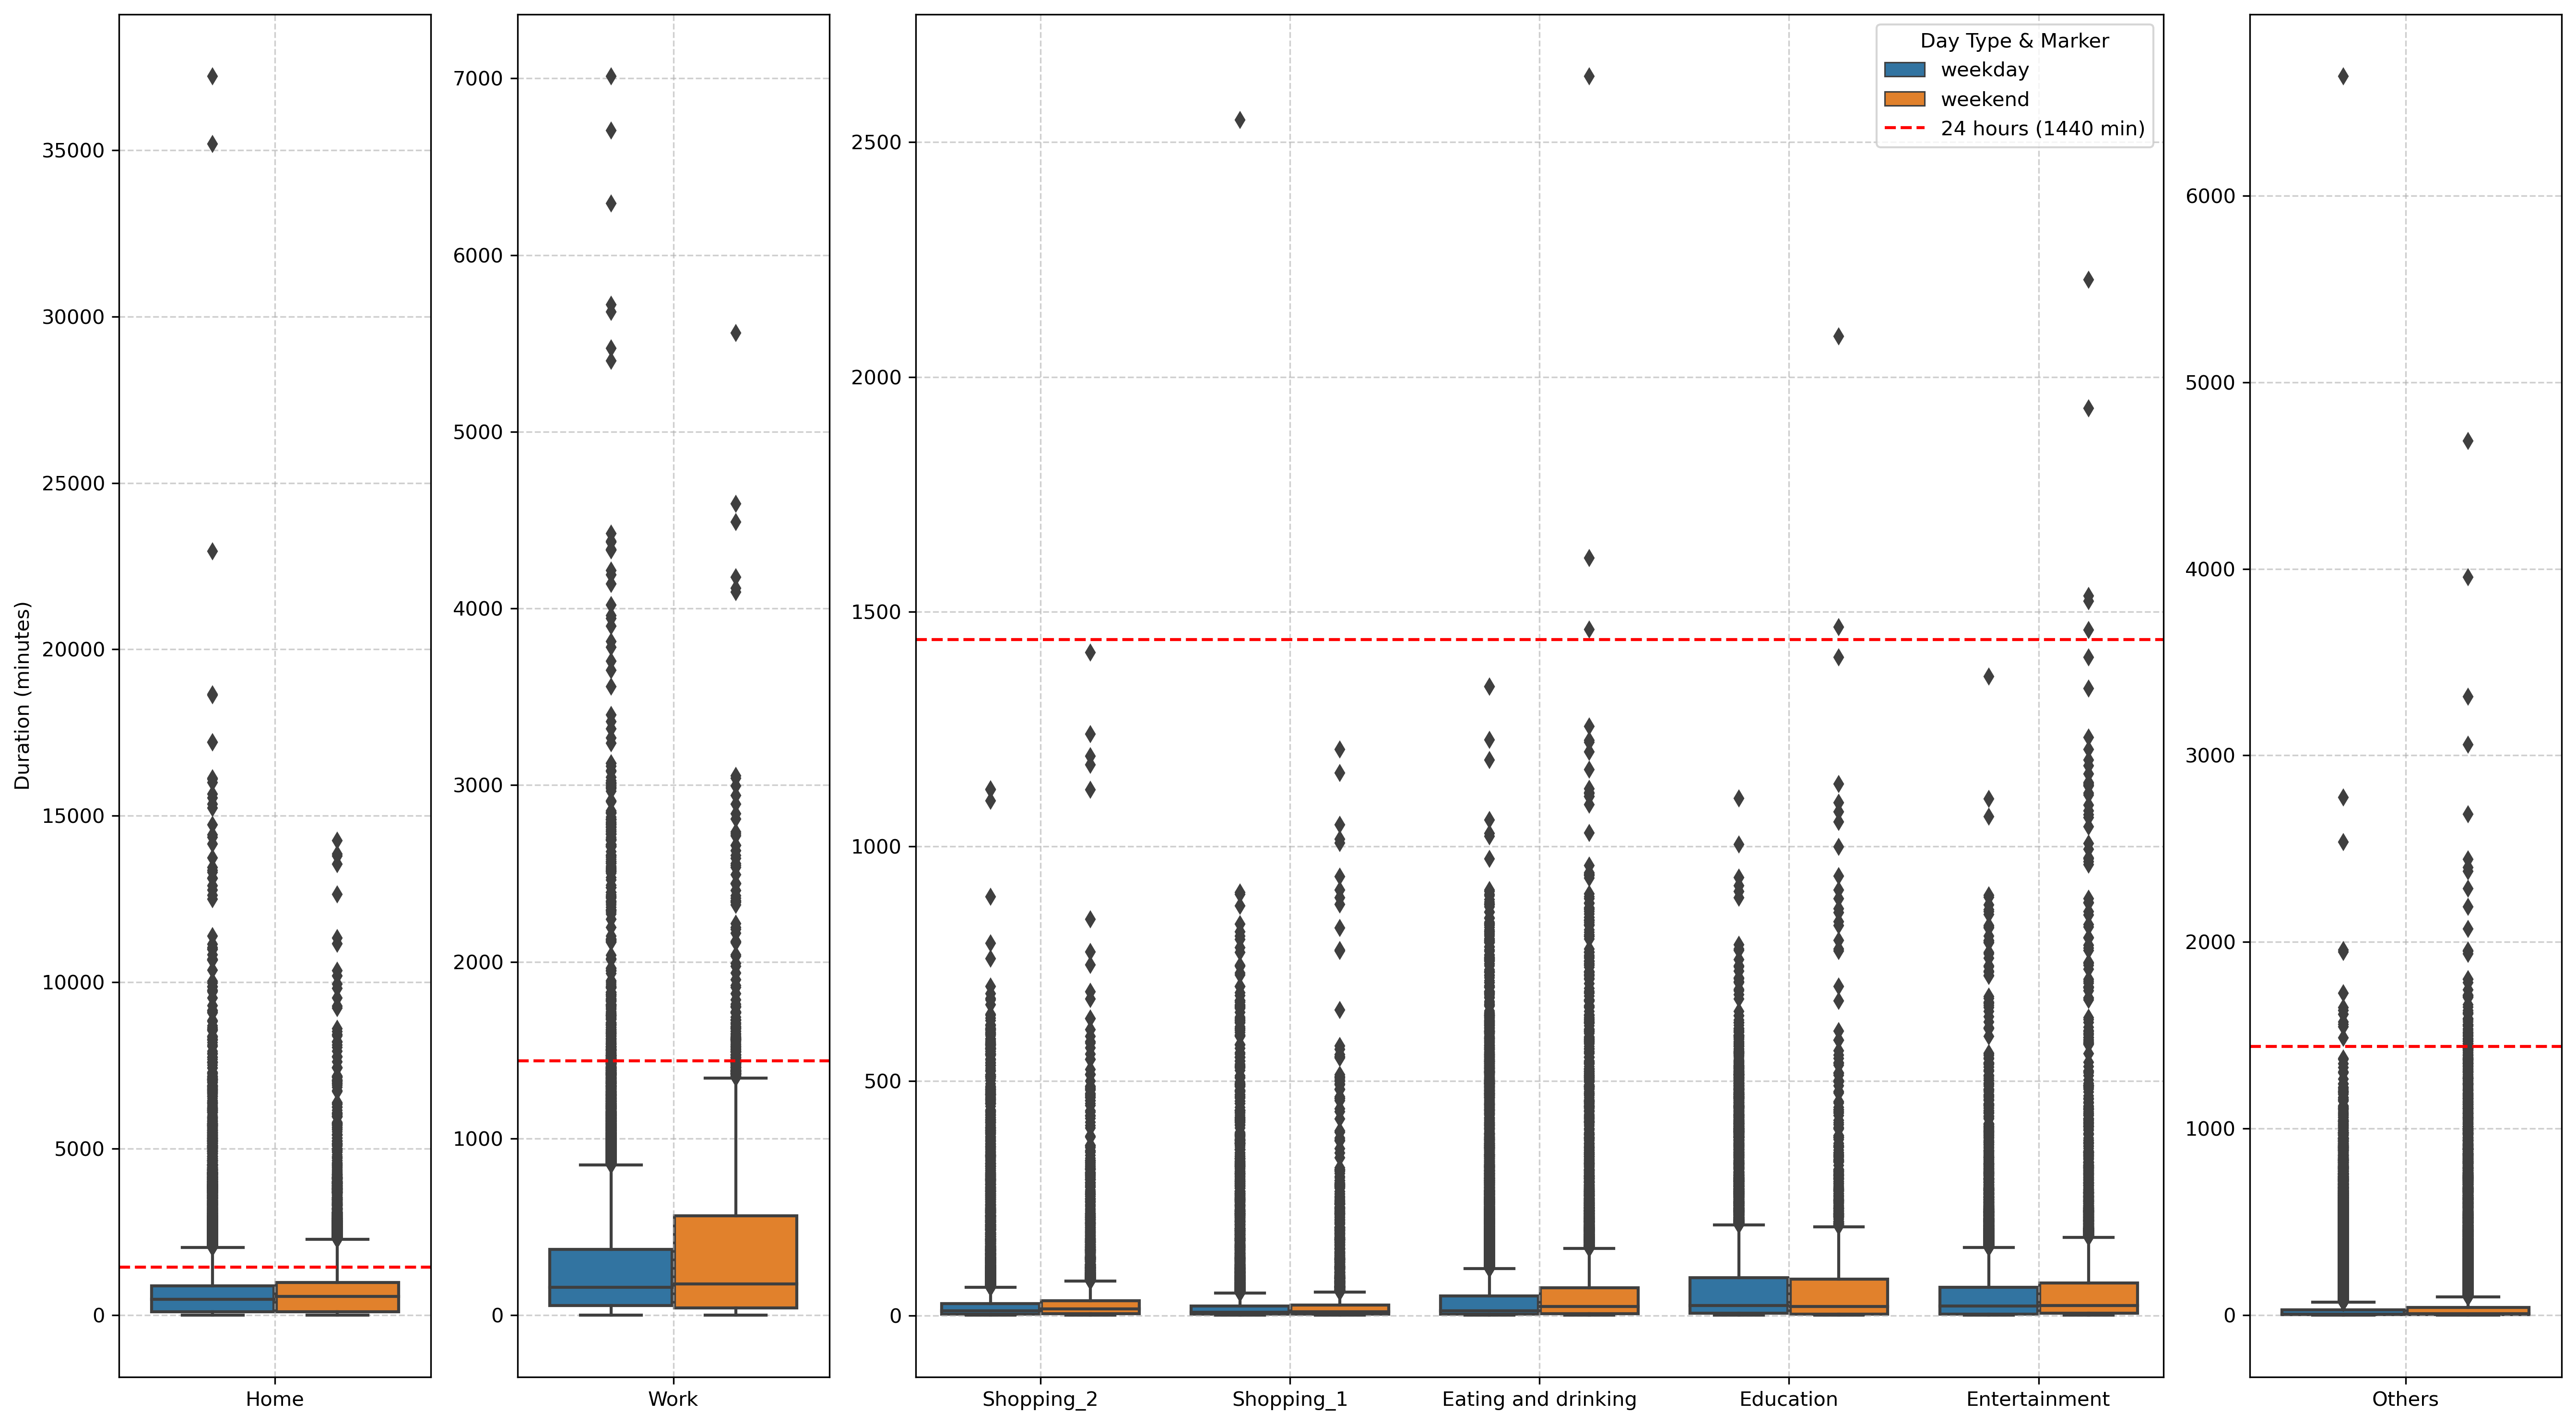

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

home_df = traject_sample[traject_sample['activity'] == 'Home']
work_df = traject_sample[traject_sample['activity'] == 'Work']
other_df = traject_sample[traject_sample['activity'] == 'Others']
other_activities_df = traject_sample[(traject_sample['activity'] != 'Home') & (traject_sample['activity'] != 'Work') & (traject_sample['activity'] != 'Others')] 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18, 10), gridspec_kw={'width_ratios': [1, 1, 4, 1]}, dpi=300)

# Step 4: Create the first box plot for 'Home' on ax1.
sns.boxplot(x='activity', y='duration', hue='is_weekend', data=home_df, ax=ax1)
ax1.set_ylabel('Duration (minutes)')
ax1.set_xlabel('')
ax1.legend().remove()
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')


# Step 5: Create the second box plot for 'Work' on ax2.
sns.boxplot(x='activity', y='duration', hue='is_weekend', data=work_df, ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.legend().remove()
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')

# Step 6: Create the third box plot for all other activities on ax3.
sns.boxplot(x='activity', y='duration', hue='is_weekend', data=other_activities_df, ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.grid(True, linestyle='--', alpha=0.6)
ax3.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')
ax3.legend(title='Day Type & Marker')

sns.boxplot(x='activity', y='duration', hue='is_weekend', data=other_df, ax=ax4)
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.legend().remove()
ax4.grid(True, linestyle='--', alpha=0.6)
ax4.axhline(y=1440, color='r', linestyle='--', label='24 hours (1440 min)')

# Step 7: Adjust layout and display the plot.
plt.tight_layout()
plt.show()


In [37]:
traject_sample.iloc[0]

userid         6B46AF01384055689E5FF203A19FFDFF
start_time                  2021-11-01 10:30:00
end_time                    2021-11-02 19:15:00
duration                            1963.766667
loc_msoa                              E02000275
activity                                   Work
day_of_week                              Monday
is_weekend                              weekday
Name: 0, dtype: object

In [24]:
print(len(set(traject_sample.userid)))
print(traject_sample.activity.unique())

5000
['Work' 'Home' 'Shopping_2' 'Shopping_1' 'Others' 'Eating and drinking'
 'Education' 'Entertainment']
